In [1]:
%load_ext autoreload
%autoreload 2

# Heidelberg Workshop number 2

<a target="_blank" href="https://colab.research.google.com/github/etienneguevel/heidelberg/blob/main/notebooks/TD.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

##  Setup
If running locally using jupyter, first intall the necessary libraries in your environment using the installation instructions in the repository.

If running from Google Colab, set `using_colab=True` below and run the cell.
In Colab, be sure to select 'GPU' under 'Resources'->'Modify the type of execution'.

In [2]:
using_colab = True

In [3]:
if using_colab:
    import torch
    import torchvision
    print("PyTorch version:", torch.__version__)
    print("Torchvision version:", torchvision.__version__)
    print("CUDA is available:", torch.cuda.is_available())
    import sys
    !git clone https://github.com/etienneguevel/heidelberg.git
    !{sys.executable} -m pip install --no-deps -r ./heidelberg/requirements_colab.txt
    !{sys.executable} -m pip install --no-deps ./heidelberg/
    %cd heidelberg/notebooks

PyTorch version: 2.6.0+cu124
Torchvision version: 0.21.0+cu124
CUDA is available: True
Clonage dans 'heidelberg'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 144 (delta 57), reused 118 (delta 33), pack-reused 0 (from 0)
Réception d'objets: 100% (144/144), 5.09 Mio | 9.81 Mio/s, fait.
Résolution des deltas: 100% (57/57), fait.
/home/etienneguevel/Documents/cours/heidelberg/heidelberg/.venv/bin/python: No module named pip
/home/etienneguevel/Documents/cours/heidelberg/heidelberg/.venv/bin/python: No module named pip
/home/etienneguevel/Documents/cours/heidelberg/heidelberg/notebooks/heidelberg/notebooks


/home/etienneguevel/Documents/cours/heidelberg/heidelberg/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# Load the dataset
from medmnist import BloodMNIST

# We need to download the dataset it might take a while
train_dataset = BloodMNIST(split="train", size=128, download=True)
val_dataset = BloodMNIST(split="val", size=128, download=True)
test_dataset = BloodMNIST(split="test", size=128, download=True)

## Classification

Classification is a key task as the relative proportion of the different white blood cells
categories indicates the presence or not of a pathology.

This part's goal is to leverage an open-source dataset of white blood cells in order to
train a Deep Learning model to perform classification.

In [5]:
# Let's load the dataset
train_dataset.info

{'python_class': 'BloodMNIST',
 'description': 'The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/bloodmnist.npz?download=1',
 'MD5': '7053d0359d879ad8a5505303e11de1dc',
 'url_64': 'https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1',
 'MD5_64': '2b94928a2ae4916078ca51e05b6b800b',
 'url_128': 'https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1',
 'MD5_128': 'adace1e0ed228fccda1f39692059dd4c',
 'url_224': 'https://zenodo.org/records/10519652/files/bloodmnist

This dataset contains images of white blood cells that are divided between 8 categories:

- basophil
- eosinophil
- erythroblast
- immature granulocytes
- lymphocyte
- monocyte
- neutrophil
- platelet

### Understand an image

Image's class is: lymphocyte



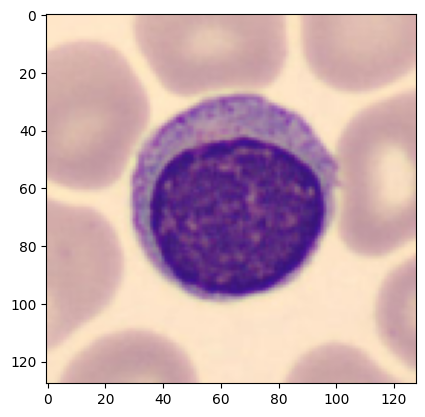

In [6]:
import random
import matplotlib.pyplot as plt

train_size = len(train_dataset)

label_dict = train_dataset.info["label"]
img, label = train_dataset[random.randint(0, train_size)]

print(f"Image's class is: {label_dict.get(str(label[0]))}\n")
plt.imshow(img)
plt.show()

The images are made of pixels, made of a grid of size H*L, and each pixel is made
of 3 channels : Red, Green and Blue.  

This makes images **3-Dimensional** objects (N\*L\*3), here the images are of size
128\*128\*3

Image shape: (128, 128, 3)


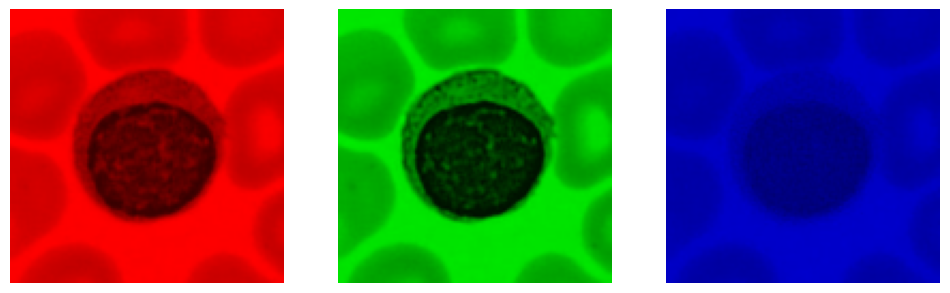

In [7]:
import numpy as np

# Convert the image to a numpy array
image = np.array(img.convert("RGB"))
print(f"Image shape: {image.shape}")

# Plot the RGB channels of the image separately
figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(12, 4))
for i, subplot in zip(range(3), plots):
    temp = np.zeros(image.shape, dtype='uint8')
    temp[:,:,i] = image[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

### Create the data objects

`torch` is a popular python framework to make Deep Learning models. Among its functionalities, it offers ways
to facilitate data usage through `Dataset` and `DataLoader` objects.  
The first step is to create a `Dataset` ([here](https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html)) object.  

You should implement three methods for that :
- `__init__` -> create the 'attributes' of our object (kind of a way of storing data)
- `__len__` -> return the number of elements of our dataset (allows our object to get called with the `len` function)
- `__getitem__` -> return the element at an index (like for a `list`). In our case an item is made of an image transformed into a `tensor` + its label

In [8]:
# The first step is to make a dataset, for this we need to create our own custom object
# Below is the "backbone" of a Dataset object, with all the necessary methods that need to be implemented
# Uncomment and execute the cell below to see the answer
from torch.utils.data import Dataset

class CustomDataset(Dataset):

    def __init__(self, data, transform):
        # initialization method, you should store data and transform as attributes
        pass

    def __len__(self):
        # should return the number of elements of the dataset
        return

    def __getitem__(self, idx):
        # should return the element of the dataset at index idx (image and label)
        # (Don't forget to transform the image!)
        return

In [3]:
# %load ../src/custom_dataset.py
from torch.utils.data import Dataset

class CustomDataset(Dataset):

    def __init__(self, data, transform):
        self.data = data
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img, label = self.data[idx]

        if self.transform:
            img = self.transform(img)

        return img, label


In [4]:
import torchvision.transforms as transforms

# Here we need a transform function to convert the data which are PIL images into vectors
transform = transforms.ToTensor()

# We use the custom dataset we just created with our imported datasets
training_dataset = CustomDataset(train_dataset, transform)
validation_dataset = CustomDataset(val_dataset, transform)
testing_dataset = CustomDataset(test_dataset, transform)

What we will want to do afterwards is to loop over the dataset, to make 'batches'
of data for the training protocol.   

`torch` provides the `DataLoader` object for this, let's use it!

In [13]:
# Make a DataLoader from the custom dataset created above
from torch.utils.data import DataLoader

train_loader = DataLoader(training_dataset, batch_size=64)
valid_loader = DataLoader(validation_dataset, batch_size=64)
test_loader = DataLoader(testing_dataset, batch_size=64)

# Let's check that the dataloader works
for images, labels in train_loader:
    print(f"Batch size: {images.shape[0]}")
    print(f"Image shape: {images.shape[1:]}")
    print(f"Labels shape: {labels.shape}")
    break

Batch size: 64
Image shape: torch.Size([3, 128, 128])
Labels shape: torch.Size([64, 1])


### Create the model

The model we are going to use for this task are Convolutional Neural Networks
([CNN](https://poloclub.github.io/cnn-explainer/)), and especially a family
of them called [ResNets](https://arxiv.org/abs/1512.03385).  

![cnn](./images/cnn.jpg)

CNN uses **Convolution** layers, the next figure shows how the convolution is
performed when having three input channels.  
First, one filter uses its three independent kernels to convolve with the RGB
channels of the input image:

![convolution](https://cdn-images-1.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif)

that are then summed to obtain a single channel.

![sum](https://cdn-images-1.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif)

This process is repeated a certain number of times with different kernels,
giving what is called **channels**.

> The number of channels does not stay constant within a network, usually it
> gradually increases!


Training an efficient model can be time-consuming. However, models for image
processing have already been created and trained for similar tasks, and are
available for reusage.  

Those models are called **pretrained**, and can be use to be adapted on our
dataset (fitting them on our custom classes of white blood cells).  
This process is called **fine-tuning**.

In [14]:
# We create a model from a pretrained point
from torchvision import models

model = models.resnet18(pretrained=True)

# We can see the blocks in our model like this
print(model)

/home/etienneguevel/Documents/cours/heidelberg/heidelberg/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/etienneguevel/Documents/cours/heidelberg/heidelberg/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

We can see that the last layer of our model gives an output of size 1000, while
what we want is an output of the same size as the number of classes of our
dataset !  

To solve this problem we can simply replace the last layer by one of the size
that we want :

In [ ]:
import torch.nn as nn

# We replace the last layer of the model with an out shape equal to our number of classes 
n_labels = len(train_dataset.info.get("label"))
model.fc = nn.Linear(in_features=512, out_features=n_labels)
model.to("cpu")
print(model)

In [ ]:
# We can see the number of parameters of our model like this
print(f"There are {sum([p.numel() for p in model.parameters()]):.2g} parameters in the model used.")

In [ ]:
for (images, labels) in train_loader:
    print(f"Batch size: {images.shape[0]}")
    print(f"Image shape: {images.shape[1:]}")
    print(f"Labels shape: {labels.shape}")

    outputs = model(images)
    print(f"Output shape: {outputs.shape}")
    break

Now the dimension of the output is in the shape that we want!

### Training loop

The next step of our process is the actual training of our model, the steps are
as follow :

- Load a batch of our dataloader
- Get the output of our model
- Compute the loss with the labels
- Update the parameters of our model

For this we are going to need the following objects :

- A criterion (ie a way to calculate the loss); for multi-label classification,
    **cross-entropy** is the most widely used loss
- An optimizer (ie an algorithm to update the weights of our model). Several
    popular options exists (Adam, Stochastic Gradient Descent...)

![optimizer](./images/optimizer.gif)  
*Speed of convergence of a model using different optimization algorithms*


Then we will implement the training loop and make the model train!

In [ ]:
# Now we need to make an optimizer + a loss
import torch.nn as nn
from torch.optim import Adam, SGD, AdamW

# cross-entropy loss is the one used for multi classification tasks
criterion = nn.CrossEntropyLoss()

# Adam is a popular optimizer, but other could be used (SGD, Adamw...)
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=1e-4) # you can also use SGD or AdamW, or try different learning rates and weight decay values

Now we have everything necessary in order to launch the training process!

In [ ]:
# Implement the training loop here
# Uncomment and execute the cell below to see the answer
from tqdm import tqdm # tqdm is a library to display progress bars while looping

# Move the model to the device (CPU or GPU)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# Training loop
n_epochs = 10 # Number of epochs to train the model (ie number of times the model will see the whole dataset)

for epoch in range(n_epochs):
    model.train()  # Set the model to training mode

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{n_epochs}"):
        optimizer.zero_grad()  # Zero the gradients -> essential step before the backward pass

        # ToDo: Calculate the outputs of the model
        
        # ToDo: Compute the loss
        loss = 0

        # Make the backward pass and update the weights
        loss.backward()  # Backward pass
        optimizer.step()  # Update the weights

    # Bonus: Implement the validation loop here
    # You need to set the model to evaluation mode and use the validation dataloader
    # to compute the validation loss and accuracy of the model every k epochs (e.g. every 5 epochs)
    if epoch % 5 == 0:
        model.eval()

In [ ]:
# %load ../src/training.py

### Visualize the results

Our dataset was split into three parts: train ,val and test. While we have used
the train for the backpropagation, and the val for monitoring, test is still
unseen to this point.

It's purpose is to the metrics at the endpoint of the training pipeline.

In [ ]:
# Execute this cell to see the results of your trained model on the test dataset
from tqdm import tqdm

def find_accuracy(model, dataloader_test, device):
    correct = 0
    total = 0
    label_test = []
    predicted_test = []

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader_test):
            # Move the data to the device 
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Predict the label with the trained model
            outputs = model(inputs)
            preds = outputs.argmax(dim=1)
            
            # Calculate the performance
            labels = labels.squeeze(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            # Add the predictions & labels in the list
            label_test.extend(labels.to('cpu').tolist())
            predicted_test.extend(preds.to('cpu').tolist())

    print('Accuracy of the network on the test images: %d %%' % (
        100 * correct / total))
    return predicted_test, label_test, correct / total

# Specify the device
device = torch.device("cuda")
model.to(device)

# Calculate the results
predictions, labels, acc = find_accuracy(model, test_loader, device)

In classification problems, it is also important to check that the algorithm
has good performances on every classes, and not only on the most dominants.  

Four metrics are usually looked at when we deal with classification issues:
- **Accuracy**, which represents the percentage of correct predictions
- **Positive Predictive Value (ppv)**, which represents the number of correct
    predictions among the total predictions made for a class  
    (ie, how much can i trust my model if it predicts that a sample is of this
    class)
- **Recall**, which represents the number of correct predictions among all the
    samples of this class in the test dataset.  
    (ie, if I have a sample of a class how much can i trust my model to find it)
- **f1-score**, which is calculated as the harmonic mean of ppv and recall.
    It represents a compromise between those two objectives.

Indeed, in case of imbalanced dataset, training can be biased and less populated
classes have deteriorated performances.

In [ ]:
# Execute this cell to visualize the results of your model on the test set
from sklearn.metrics import classification_report

names = [n[:20] for n in train_dataset.info.get("label").values()]
print(classification_report(labels, predictions, target_names=names))

Another way to visualize the results is with a confusion matrix. It is a table
layout where each row represents a class, and each column represents the
instances in a predicted class.  

![c_matrix](./images/confusion_matrix.png)

*Here is an example of a confusion matrix with voyels as class*

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

names = [n[:20] for n in train_dataset.info.get("label").values()]

C_matrix = pd.DataFrame(confusion_matrix(labels, predictions))
C_matrix.index = names
C_matrix.columns = names

fig = plt.figure(figsize=(12, 8))
sns.heatmap(C_matrix, annot=True, cmap="flare", vmax=100, fmt='.3g')
fig.show()

### Bonus : Make your own Network

Just before we trained a model, but it was a pretrained one, and we did not
pick its different layers.  

Pytorch's framework allows to easily create your model with the `nn.Module` class.  
The idea is to :
- create the layers of our model within the `__init__` method. torch already has
    all of the most-used layers implemented,  
    you just need to pick the ones interesting you !  

- Implement a `forward` method. This method will be the one used when calling
    `model(inputs)`, and return the outputs of the model.  

> **Tip** : the `torch.nn.Sequential` object allows to concatenate different torch
> layers together, as an example a CNN layer could be like :
>
>```Python
>import torch.nn as nn
>
>nn.Sequential(
>    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding='same'),
>    nn.BatchNorm2d(32),
>    nn.ReLU(),
>    nn.MaxPool2d(kernel_size=(2, 2))
>)
```

In [ ]:
# Bonus: You can also make your own model architecture!
# Uncomment and execute the cell below to see a simple CNN appear
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net, self).__init__()
        # create layers here
        # self.l1 = ...

    def forward(self, x):
        # here the output should be a vector of size num_classes
        pass

In [ ]:
# %load ../src/net.py

## Foundation models

*Foundation models* are called like this because their outputs, called **embeddings**
are not predictions but vectors of a shape $\mathbb{R}^n$.  
The embeddings are the angular stone used for other usages, which can be classification,
segmentation, multimodal models...

In theory every architecture can be used to make a fondation model, but in practice
[Transformers](https://poloclub.github.io/transformer-explainer/) are THE type of
model commonly used,  
and have been the workhorse of the AI ecosystem for the last 8 years.

### Vision Transformers (ViT)

[ViTs](https://arxiv.org/abs/2010.11929) are the adaptation of transformers for images; they take the image,
split them in squares that are transformed in vectors (called **embeddings**),  
and then pass them through a Transformer Neural Network.  

![ViT_tokens](./images/ViT_token.png)

A special token, named **[CLS]** token, is added to the sequence of tokens,
whose state at the output of the model serves as an **image representation**.  
It is then used for the downstream tasks, like classification.  
> The [CLS] token is an artificial construction; it doesn't represent anything at the beginning, but his job is to concatenate the
information of the image patches into one **embedding**.

The [model](https://arxiv.org/abs/2404.05022) we are going to used in this part has been
trained on White Blood Cells images, it:
- Uses the Vision Transformer ([ViT](https://arxiv.org/abs/2010.11929)) architecture
- Uses [DINOv2](https://github.com/facebookresearch/dinov2) as training framework
- Was trained on ~300k images from open-sourced datasets
- Contains 4 models of different sizes, ranging from 22M to 1.1B of parameters

In [5]:
import timm

# Load model from the hub
model = timm.create_model(
  model_name="hf-hub:1aurent/vit_small_patch14_224.dinobloom", # you can change the size of the loaded model here
  pretrained=True,
).eval()

# Get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
transform = timm.data.create_transform(**data_config, is_training=False)

print("Below is the list of the layers contained within our model:\n")
model

Below is the list of the layers contained within our model:



VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identit

Here we can see the architecture of the model that we use, which is very long.

Indeed it is made of 12 blocks, each having:
- An Attention layer
- A Mlp layer with one hidden layer
- Normalizing and Scaling layers in between

> Can you find the dimension of the embeddings of the model that you use ? What about its number of elements ?

In [16]:
# Try here, or uncomment and execute the cell below to see the answer

In [17]:
# %load ../src/model_information.py

Image's class is: lymphocyte



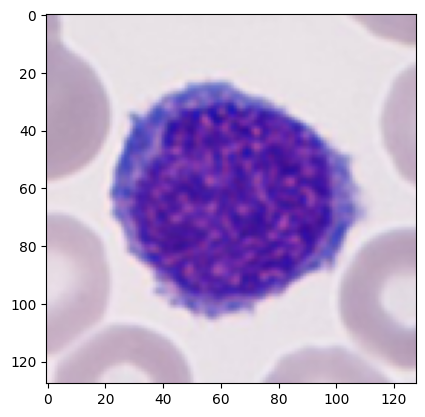

Look of the output:
tensor([[ 3.0497e+00,  2.2895e-01, -7.2911e-02,  1.9634e+00,  1.4456e+00,
          1.3788e+00,  6.3589e+00,  6.0329e-01, -3.5147e+00,  5.3269e-01,
         -1.8761e-01, -5.0470e+00, -1.9502e+00, -4.7114e+00,  3.2866e+00,
          8.9351e-01,  3.9731e-01,  1.1941e+00, -2.5156e+00, -1.8839e+00,
         -1.8982e-01,  3.1812e-01, -1.6237e+00,  4.6451e-01, -4.2611e+00,
         -4.1396e+00,  1.7625e+00, -2.2831e+00, -3.1688e+00,  1.8034e+00,
         -2.8818e+00,  2.9780e+00, -2.7609e+00,  3.2093e+00, -4.5418e+00,
          5.4347e-01, -2.6372e+00,  1.8946e+00, -2.7834e-02,  1.8437e+00,
         -5.1762e+00,  6.0813e+00,  6.2408e-01,  3.9847e+00,  1.4312e+00,
         -5.4979e-01,  4.2085e-02,  2.6767e-01, -4.8493e+00,  2.1927e+00,
          1.6250e+00,  6.1163e+00, -4.4525e+00, -1.3983e+00,  2.1805e+00,
         -2.5432e+00,  2.1390e-01, -6.9295e+00, -2.0010e+00, -3.6454e+00,
          2.0726e+00,  2.5315e+00, -1.0547e+00, -1.8201e+00,  1.6067e+00,
          5.6175e+

In [18]:
# Let's visualize a random image from the training set and use the model on it
img, label = train_dataset[random.randint(0, train_size)]

print(f"Image's class is: {label_dict.get(str(label[0]))}\n")
plt.imshow(img)
plt.show()
# Below is the code to use the model on a single image

data = transform(img).unsqueeze(0) # input is a (batch_size, num_channels, img_size, img_size) shaped tensor
output = model(data)

print(f"Look of the output:\n{output}")

### Probe the embeddings quality

Now that we have an easy access to the model embeddings, we can test their quality on the dataset
that we have used before.

Popular technics are:
- k-[Nearest-Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) (k-  NN), with k being usually 1 & 20, which consists on making a prediction according
    to the most similar points of the training dataset  
    (k being the number of neighbours to take into account).

![NN](./images/knn.png)

- [Linear Probing](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html),
    which consists of fitting a linear regression on the embeddings, and then
    evaluating its performance.

![linear_probing](./images/Multiclass-logistic-regression-classification.jpg)

#### Make the dataset

Calculating the embeddings can be compute intensive, if we use transformer models
having huge amounts of parameters.  
However we only need to do that once, as we use them as mathematical objects, and
**we do not modify** the foumdation model afterwards.  

To do that we will create a Dataset object that will contain the embeddings calculated
for a model on a Dataset (the same as the one we used before).

In [19]:
# We are going to make a new dataset object in order to calculate the embeddings of the images.
# This allow to calculate once the embeddings and then reuse them for later applications
from heidelberg.embedding_dataset import EmbeddingDataset

# Make the embedding dataset and test shapes
emb_train = EmbeddingDataset(training_dataset, model, transform, n_samples=1600)
emb_test = EmbeddingDataset(testing_dataset, model, transform)

# Unpack the embeddings & labels
train_array = np.array([emb for emb, _ in emb_train])
train_labels = np.array([lab for _, lab in emb_train])

test_array = np.array([emb for emb, _ in emb_test])
test_labels = np.array([lab for _, lab in emb_test])

Calculating embeddings:  68%|██████▊   | 17/25 [00:38<00:18,  2.28s/batch]Traceback (most recent call last):
  File "/home/etienneguevel/.local/share/uv/python/cpython-3.11.12-linux-x86_64-gnu/lib/python3.11/multiprocessing/util.py", line 303, in _run_finalizers
    finalizer()
  File "/home/etienneguevel/.local/share/uv/python/cpython-3.11.12-linux-x86_64-gnu/lib/python3.11/multiprocessing/util.py", line 227, in __call__
    res = self._callback(*self._args, **self._kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/etienneguevel/.local/share/uv/python/cpython-3.11.12-linux-x86_64-gnu/lib/python3.11/multiprocessing/util.py", line 136, in _remove_temp_dir
    rmtree(tempdir, onerror=onerror)
  File "/home/etienneguevel/.local/share/uv/python/cpython-3.11.12-linux-x86_64-gnu/lib/python3.11/shutil.py", line 763, in rmtree
    onerror(os.rmdir, path, sys.exc_info())
  File "/home/etienneguevel/.local/share/uv/python/cpython-3.11.12-linux-x86_64-gnu/lib/python3.11/

Implement here the evaluation of the above mentionned techniques!  

> Tip: You can use the sklearn library for k-NN and Linear probing

In [ ]:
# Try to make function implementing the k-NN and linear probing of the embedding
# Uncomment and execute the cell below to get the answer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier


names = [n[:20] for n in train_dataset.info.get("label").values()]

def k_nearest_neighbor_eval(
    train_array,
    train_labels,
    test_array,
    test_labels,
    k=1,
    target_names=names
):
    """
    Define a function that train a k-NN classifier on the training embeddings
    and evaluates it on the validation embeddings.
    """
    # ToDo: Initialize the classifier

    
    # ToDo: Fit the model on train_array and train_labels
    

    # ToDo: Make the predictions on test_array
    preds = None  # Replace with your predictions

    # Calculate the metrics of the predictions
    print(classification_report(test_labels, preds, target_names=target_names))

    return


def linear_probing_eval(
    train_array,
    train_labels,
    test_array,
    test_labels,
    target_names=names
):
    """
    Define a function that train a k-NN classifier on the training embeddings
    and evaluates it on the validation embeddings.
    """
    # ToDo: Initialize the classifier


    # ToDo: Fit the model on train_array and train_labels
    

    # ToDo: Make the predictions on test_array
    preds = None  # Replace with your predictions

    # Calculate the metrics of the predictions
    print(classification_report(test_labels, preds, target_names=target_names))

    return


# Use the functions defined above to evaluate the embeddings
print('1-NN evaluation:\n')
_ = k_nearest_neighbor_eval(
    train_array,
    train_labels,
    test_array,
    test_labels,
    k=1
)
print('-' * 75)

print('\n20-NN evaluation:\n')
_ = k_nearest_neighbor_eval(
    train_array,
    train_labels,
    test_array,
    test_labels,
    k=20
)
print('-' * 75)

print('\nLinear probing:\n')
_ = linear_probing_eval(
    train_array,
    train_labels,
    test_array,
    test_labels
)
print('-' * 75)

In [ ]:
# %load ../src/embedding_evaluation.py

#### Visualize the embeddings

Visualisation of the embeddings in a 2D (x - y) plan is a good way to check the quality of our embeddings.  
Indeed, if the embeddings we produced are of a good quality, there should be clusters corresponding to each one
of our classes.  

Among popular dimensionality reduction techniques there are :
- [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html), a popular method for high dimensional biological datasets that captures well the clusters within a dataset
- [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html),
    (t-Distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique primarily  
    used for visualizing high-dimensional data in two or three dimensions.


In [ ]:
# Try implementing one of the two techniques, and use the plot function below to get the 2D representation
# Uncomment the cell below for the answer

In [ ]:
# %load ../src/umap_tsne.py

In [ ]:
import pandas as pd
import seaborn as sns

translate_dict = train_dataset.info.get("label")

def plot_embeddings(embs, labels):
    
    # Make a dataframe with the embeddings
    data = pd.DataFrame(
        [
            [e[0], e[1], translate_dict.get(str(lab[0]))[:20]]
            for e, lab in zip(embs, labels)
        ],
        columns=["x", "y", "class"]
    )

    sns.relplot(
        data=data,
        x="x", y="y", hue="class", style="class", height=8, aspect=1.5
    )
    plt.show()

In [ ]:
uemb, labels = get_umap(emb_test)
plot_embeddings(uemb, labels)

In [ ]:
temb, labels = get_tsne(emb_test)
plot_embeddings(temb, labels)

### Use the image patch embeddings

The foundation model is a Vision Transformer, while we are mainly interested in
the [CLS] token, the patches of the images are also vectors that we can use.  



In [ ]:
import torch
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA

from heidelberg.attn import get_attn

def calibrate_pca(img, model, device):
    n = img.shape[0]
    img = img.to(device)
    model.to(device)
    with torch.no_grad():
        patches = model.get_intermediate_layers(img)

    # calibrate PCA for background
    im_test = patches[0].cpu().numpy()
    
    pca_fg = PCA(n_components=1)
    pca_features = pca_fg.fit_transform(im_test.reshape([-1, 1024]))
    norm_patches = minmax_scale(pca_features)
    pca1 = norm_patches.copy()
    # separate from background
    image_norm_patches = norm_patches.reshape([n,patch_h * patch_w])
    im_test[image_norm_patches > 0.6] = 0
    
    # calibrate PCA for RGB
    pca_rgb = PCA(n_components=3)
    pca_features = pca_rgb.fit_transform(im_test.reshape([-1, 1024]))
    norm_patches = minmax_scale(pca_features)
    
    return pca_fg, pca_rgb, pca1

In [12]:
patches = model.get_intermediate_layers(batch)

: 

In [10]:
from torch.utils.data import DataLoader

patch_h=37
patch_w=37

t = transforms.ToPILImage()
transform = transforms.Compose([
    transforms.GaussianBlur(9, sigma=(0.1, 2.0)),
    transforms.Resize((patch_h * 14, patch_w * 14)),
    transforms.CenterCrop((patch_h * 14, patch_w * 14)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ]
)

dataset_ = CustomDataset(train_dataset, transform=transform)
calibration_loader = DataLoader(dataset_, batch_size=128)

for batch, lab in calibration_loader:
    break

pca_fg, pca_rgb, pca1 = calibrate_pca(batch, model, "cpu")

ValueError: cannot reshape array of size 65712 into shape (128,1369)

In [11]:
65712 / 128

513.375

### Bonus : Attention map

As of now we almost only used the [CLS] token, and left alone the tokens of the image patches.  

Embeddings of an image evolve from one layer to another, and are calculated through the attention mechanism.  
In the attention mechanism new tokens are updated according to their similarity with other tokens (the more similar,
the more their update will be consequent).


As such, one interesting thing to look at is the **attention map of the [CLS] token in the last layer**,
as it kind of indicate which parts of the images are most used for the creation the image's embedding.

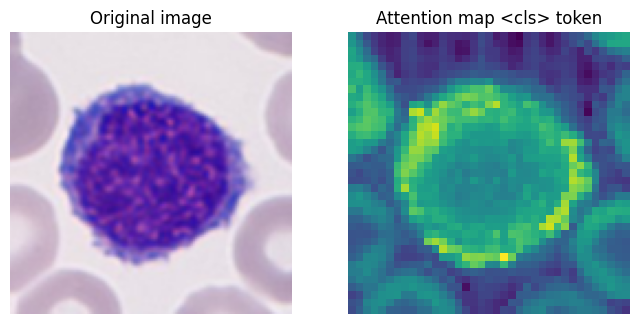

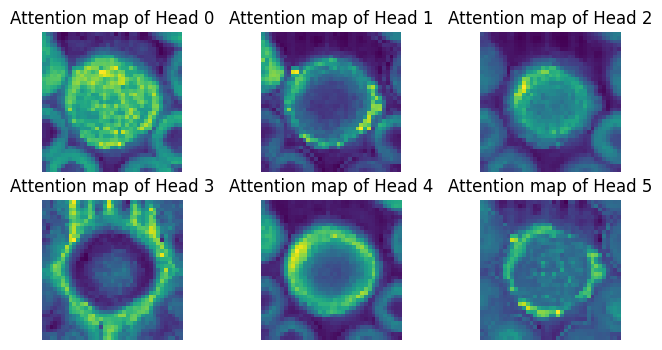

In [28]:
from heidelberg.attn import get_attn

patch_h, patch_w = 37, 37
model.cpu()

transform = transforms.Compose([
    transforms.GaussianBlur(9, sigma=(0.1, 2.0)),
    transforms.Resize((patch_h * 14, patch_w * 14)),
    transforms.CenterCrop((patch_h * 14, patch_w * 14)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ]
)

def plot_attention_map(img, layer, model, save=False):
    img_tensor = transform(img)
    cls_attn = get_attn(img_tensor, model, layer)
    num_heads, _ = cls_attn.shape
    
    cls_tot = torch.sum(cls_attn, dim=0).reshape((patch_h, patch_w))
    
    img_or = np.array(img) 
    # Plot the total attention (summed over the heads)
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    
    ax[0].imshow(img_or)
    ax[0].axis("off")
    ax[0].set_title("Original image")
    ax[1].imshow(cls_tot)
    ax[1].axis("off")
    ax[1].set_title("Attention map <cls> token")
    
    if save:
        plt.savefig("attention_map_cls.png")
    plt.show()

    # Plot the attention of the heads
    k, l = 3, num_heads // 3 + (num_heads % 3 != 0)
    fig, ax = plt.subplots(l, k, figsize=(8, 4))

    for i in range(l):
        for j in range(k):
            attn_map = cls_attn[3 * i + j, :].reshape((patch_h, patch_w))
            ax[i][j].imshow(attn_map)
            ax[i][j].axis("off")
            ax[i][j].set_title(f"Attention map of Head {3 * i + j}")
    plt.show()

last_layer = [blk for blk in model.blocks][-1]
plot_attention_map(img, last_layer, model)